# Final Project SEARCH ENGINE
Project Summary
In this project, you are asked to collect data from Twitter, build a search engine, and answer 3 research questions.

Group Members: 

· Laura Mestres  U150394 - NIA: 205906

· Diana Tyman    U150398 - NIA: 206747


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter
from config import *
import time
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import collections
from numpy import linalg as la
import string
import re
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
import json
import datetime
import tweepy

In [2]:
# add your user personal keys. 

## access token informations 
access_token1 = "1336009859809107971-qInpoq0K6vNW8fzmSLwzd1ThVx1FiF"
access_token_secret1 = "yk9FutHvIMY2jISMvQrgyhxs56SbbeoYEPVqoNw6oB1UF"

consumer_key1 = "VmF0Ec3y1ODSEuWXOktNhlTN4"
consumer_secret1 = "zO9j2wuMWnlZK6gHN8mNl2XJy3LgoRQPeGxNassOzbyljjyvqE"

In [3]:
auth = OAuthHandler(consumer_key1, consumer_secret1)
auth.set_access_token(access_token1, access_token_secret1)
api = API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Collect tweets. We did not use scrapping as we could not access the likes and retweet count by updating them later. We comment this cell as we already have the json.

In [4]:
'''%%time

OUTPUT_FILENAME = "data/one.json"
stop_condition = 200000

#l = MyStreamListener(api, OUTPUT_FILENAME, stop_condition)
# here we recall the Stream Class from Tweepy to input the authentication info and our personalized listener 
#stream = Stream(auth=api.auth, listener=l)

# keywords we may want decide to track 
TRACKING_KEYWORDS = 'coronavirus OR covid OR #COVID OR #coronavirus OR #COVID19' + '-filter:retweets'

# Open/Create a file to append data
csvFile = open('tweets.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q=TRACKING_KEYWORDS,count=100, lang="en").items():
    print(tweet, tweet.text)
    #csvWriter.writerow([tweet, tweet.text.encode('utf-8')])
    with open('tweets.json', 'a') as f:
        f.write(json.dumps(tweet._json))
        f.write("\n")


stream.filter(
    track=TRACKING_KEYWORDS, 
    is_async=False, 
    languages = ["en"]
)'''

'%%time\n\nOUTPUT_FILENAME = "data/one.json"\nstop_condition = 200000\n\n#l = MyStreamListener(api, OUTPUT_FILENAME, stop_condition)\n# here we recall the Stream Class from Tweepy to input the authentication info and our personalized listener \n#stream = Stream(auth=api.auth, listener=l)\n\n# keywords we may want decide to track \nTRACKING_KEYWORDS = \'coronavirus OR covid OR #COVID OR #coronavirus OR #COVID19\' + \'-filter:retweets\'\n\n# Open/Create a file to append data\ncsvFile = open(\'tweets.csv\', \'a\')\n#Use csv Writer\ncsvWriter = csv.writer(csvFile)\n\nfor tweet in tweepy.Cursor(api.search,q=TRACKING_KEYWORDS,count=100, lang="en").items():\n    print(tweet, tweet.text)\n    #csvWriter.writerow([tweet, tweet.text.encode(\'utf-8\')])\n    with open(\'tweets.json\', \'a\') as f:\n        f.write(json.dumps(tweet._json))\n        f.write("\n")\n\n\nstream.filter(\n    track=TRACKING_KEYWORDS, \n    is_async=False, \n    languages = ["en"]\n)'

# 1. Data Collection

In [5]:
with open("tweets.json", "rb") as f:
    data = f.readlines()
    data = [json.loads(str_) for str_ in data]

In [6]:
#save the tweets on a dataframe
df_tweets = pd.DataFrame.from_records(data)
df_tweets.shape

(39850, 30)

In [7]:
df_tweets.tail()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,retweeted_status
39845,Thu Dec 17 22:08:42 +0000 2020,1339694033095028737,1339694033095028737,"In addition, @GovLarryHogan has issued an emer...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
39846,Thu Dec 17 22:08:42 +0000 2020,1339694032948133889,1339694032948133889,RT @VicGovDHHS: Yesterday there were 0 new loc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Dec 17 21:05:44 +0000 2020...
39847,Thu Dec 17 22:08:40 +0000 2020,1339694026296012802,1339694026296012802,At least 80 inmates in Kingston prison test po...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,20,False,False,en,False,NaN,NaN,NaN,"{'media': [{'id': 1339694022475001861, 'id_str...",NaN
39848,Thu Dec 17 22:08:36 +0000 2020,1339694007295881217,1339694007295881217,RT @riccimike: 6) EXPANDED TRAVEL AND TESTING ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,None,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Dec 17 22:07:30 +0000 2020...
39849,Thu Dec 17 22:08:35 +0000 2020,1339694004586205186,1339694004586205186,i made the mistake of taking a covid test at d...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,3,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#we can see the number of entries is 39850. But we will need to delete the retweets
#we can also see the number of attributes retrieved from the tweet.
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39850 entries, 0 to 39849
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 39850 non-null  object 
 1   id                         39850 non-null  int64  
 2   id_str                     39850 non-null  object 
 3   text                       39850 non-null  object 
 4   truncated                  39850 non-null  bool   
 5   entities                   39850 non-null  object 
 6   metadata                   39850 non-null  object 
 7   source                     39850 non-null  object 
 8   in_reply_to_status_id      8168 non-null   float64
 9   in_reply_to_status_id_str  8168 non-null   object 
 10  in_reply_to_user_id        8758 non-null   float64
 11  in_reply_to_user_id_str    8758 non-null   object 
 12  in_reply_to_screen_name    8758 non-null   object 
 13  user                       39850 non-null  obj

# 2. Build the Search Engine

Pre-processing the Tweets
We want to create a Search Engine that, given as input a query, returns the most relevant tweets that match the query. 

As a first step, you have to preprocess the documents by 

** Removing stop-words **

** Removing punctuation **

** Stemming **

AND… anything else you think it's needed 
IMPORTANT - think about if you want to exclude or not the hashtags from your pre-processing steps (e.g. removing the “#” from the word), since it may be useful to involve them as separated terms inside the inverted index

Suggested library that may help you: nltk

Don’t use the USERS DATA information (json included in the scraped tweet) in your search engine! The ID of the users should be anonymized, including mentions!


**PRE-PROCESSING**

In [9]:
def delete_retweets(df_tweets, column):
    df_tweets[column]=df_tweets[column].astype(str) 
    df_tweets = df_tweets[df_tweets[column] =='nan']
    print(df_tweets.info())
    return df_tweets

In [10]:
#we delete retweets of the dataframe for convenience. It is true that we are left with very few
#but as mentioned in the report we have not managed to get more. We had tried many keywords
#and different time for scrapping.
df_tweets= delete_retweets(df_tweets,'retweeted_status')
df_tweets=df_tweets.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24788 entries, 0 to 39849
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 24788 non-null  object 
 1   id                         24788 non-null  int64  
 2   id_str                     24788 non-null  object 
 3   text                       24788 non-null  object 
 4   truncated                  24788 non-null  bool   
 5   entities                   24788 non-null  object 
 6   metadata                   24788 non-null  object 
 7   source                     24788 non-null  object 
 8   in_reply_to_status_id      8168 non-null   float64
 9   in_reply_to_status_id_str  8168 non-null   object 
 10  in_reply_to_user_id        8758 non-null   float64
 11  in_reply_to_user_id_str    8758 non-null   object 
 12  in_reply_to_screen_name    8758 non-null   object 
 13  user                       24788 non-null  obj

In [11]:
#used to see how to access/extract hastags for later function
df_tweets['entities'][3]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'profesterman',
   'name': 'Professor Adrian Esterman FACE',
   'id': 2707955850,
   'id_str': '2707955850',
   'indices': [0, 13]}],
 'urls': [{'url': 'https://t.co/A2KnDdO1ig',
   'expanded_url': 'https://twitter.com/i/web/status/1339531351700111360',
   'display_url': 'twitter.com/i/web/status/1…',
   'indices': [117, 140]}]}

In [12]:
#modified function of the practice to take all the hastags not only the first one
def extract_line_hashtags(index):
    """
    change the function to take all the hashtags if there is more than 1
    
    """
    hashtags_lists = df_tweets["entities"][index]["hashtags"]
    
    hashtags=pd.Series() 
    if hashtags_lists != []:

        for n_hast in range(len(hashtags_lists)):
            #print(n_hast)
            hashtags=hashtags.append(pd.Series([hashtags_lists[n_hast]['text']]))
        
    return hashtags

** Removing stopwords + punctuation + stemming **

In [13]:
def remove(line, hashtags):
    
    #stopwords from english lang
    stemming = PorterStemmer()
    stops = set(stopwords.words("english")) 
    
    line = line.encode('ascii', 'ignore').decode('ascii')
    
    # split the text to get list of terms
    line = line.split()
    
    # we save the url so they are not modified 
    url = ""
    for word in line:
        if '@' in word:
            line.remove(word)     #here we delete the users mentioned in the tweet to preserve anonimity
        elif 'https' in word:
            url = word            #we save the url
        else:
            continue
            
    # remove stopwords 
    line = [x for x in line if x not in stops]  
    
    # Stemming 
    #line = [stemming.stem(word) for word in line] 
    for word in line:
        if word not in hashtags:
            stemming.stem(word)
            
    # we join because the stemming returns a list with the words and not the line itself
    line = ' '.join(line)
    
    # transform in lowercase
    line = line.lower() 
    
    # we remove the url from the tweet text
    line = re.sub(r"http\S+", "", line) 
    
    # remove punctuation
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    remove_punct = ' '.join(line.translate(table).split())
    
    return remove_punct,url

In [14]:
def listToString(s):  
    '''
    s - List of hashtags to transform to String 
    '''
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += (ele + ' ')
    
    # return string   
    return str1  

In [15]:
#save everything on a dataframe to be able to compute later the scores of each tweet if our score is selected. 
#If not also useful for structuring data and having data more accesible than json structure
def create_output_string_fromat(df_tweets):
    df_tweets['clean_tweet'] = 0
    df_tweets['user_name'] = 0
    df_tweets['hashtags'] = 0
    df_tweets['url'] = 0
    df_tweets['print_info'] =''
    for index,line in df_tweets['text'].iteritems():

        #status = api.get_status(df_tweets["id"][index])    here we tried to get the updated stats of the tweets (#likes, #rt) but did not work
        hashtags = extract_line_hashtags(index)                 #we call extract_line_hashtags() to extract hashtags of the tweet
        hashtags = listToString(hashtags)                       #transform list of hashtags to string

        clean_tweet,url = remove(line, hashtags)                          #we call remove() function to clean the tweets
        user_name = df_tweets["user"][index]["screen_name"]     #get screen name of the tweet's author
        date = df_tweets['created_at'][index]                   #get date and time of tweet creation
        rt_count = str(df_tweets['retweet_count'][index])       #get number of retweets
        likes_count = str(df_tweets['favorite_count'][index])   #get number of likes

        #rt_count = str(status.retweet_count)         #update number of retweets   - did not work
        #likes_count = str(status.favorite_count)     #update number of likes      - did not work

        df_tweets['clean_tweet'][index] = clean_tweet           #save clean tweet to dataframe
        df_tweets['user_name'][index] = user_name               #save user name to datafrme
        df_tweets['hashtags'][index] = hashtags                 #save hashtags to datafrme
        df_tweets['url'][index] = url                           #save url to datafrme

        # write 'out' also as a column for the df_tweets so it is easier access
        out  = str(clean_tweet + '|' + user_name +'|'+ date + '|' + hashtags + '|' + likes_count + '|' + rt_count + '|' + url) 
        df_tweets['print_info'][index]=out
    return df_tweets

In [16]:
df_tweets= create_output_string_fromat(df_tweets)

<ipython-input-12-70a14323d0af>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hashtags=pd.Series()
<ipython-input-15-f9b55d5f0c91>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['clean_tweet'][index] = clean_tweet           #save clean tweet to dataframe
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-15-f9b55d5f0c91>:25: SettingWithCopyWarning: 
A value is 

We check if the data cleaned correctly...

In [17]:
df_tweets['text'][3]

'@profesterman Blame and fine returned travellers who failed to protect themselves from Covid just before trip to Au… https://t.co/A2KnDdO1ig'

In [18]:
df_tweets['clean_tweet'][3]

'blame fine returned travellers failed protect covid trip au'

In [19]:
df_tweets.head(3)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,retweeted_status,clean_tweet,user_name,hashtags,url,print_info
0,Thu Dec 17 11:22:17 +0000 2020,1339531356716609543,1339531356716609543,"@AntarcticGlacie @johnredwood by ""economists a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.339477e+18,1339477072926916608,...,NaN,NaN,NaN,NaN,nan,johnredwood economists agree good growth econo...,SixChipTwat,,https://t.co/cJwfMk71i6,johnredwood economists agree good growth econo...
1,Thu Dec 17 11:22:17 +0000 2020,1339531355844202497,1339531355844202497,@annaturley @colinth7 @johnestevens Seems like...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.339321e+18,1339320746460450816,...,NaN,NaN,NaN,NaN,nan,colinth7 seems like set pretty good example me...,onebritishguy,,https://t.co/HTqpWcFZQf,colinth7 seems like set pretty good example me...
2,Thu Dec 17 11:22:16 +0000 2020,1339531352631349248,1339531352631349248,Heads of government who have had #COVID19 \n\n...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,NaN,NaN,NaN,NaN,nan,heads government covid19 johnson bolsonaro luk...,RossFootball,COVID19,https://t.co/wX7LUURIk6,heads government covid19 johnson bolsonaro luk...


**SEARCH ENGINE**

In [20]:
def create_index_tfidf(df_tweets, numDocuments):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    lines -- collection of Wikipedia articles
    numDocuments -- total number of documents
    
    Returns:
    index - the inverted index (implemented through a python dictionary) containing terms as keys and the corresponding 
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """
        
    index=defaultdict(list)
    tf=defaultdict(list) #term frequencies of terms in documents (documents in the same order as in the main index)
    df=defaultdict(int)         #document frequencies of terms in the corpus
    titleIndex=defaultdict(str)
    idf=defaultdict(float)
    for id_,line in enumerate(df_tweets.clean_tweet):
        terms = line.split('|')
        terms = terms[0].split()
        page_id = id_         
        titleIndex[page_id] = df_tweets['print_info'][id_]       
        
        termdictPage={}

        for position, term in enumerate(terms): ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corrisponding list
                termdictPage[term][1].append(position) 
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                termdictPage[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in python)
        
        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm=0
        for term, posting in termdictPage.items(): 
            # posting is a list containing doc_id and the list of positions for current term in current document: 
            # posting ==> [currentdoc, [list of positions]] 
            # you can use it to inferr the frequency of current term.
            norm+=len(posting[1])**2 
        norm=math.sqrt(norm)


        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in termdictPage.items():     
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4))  ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1  # increment df for current term
        
        #merge the current page index with the main index
        for termpage, postingpage in termdictPage.items():
            index[termpage].append(postingpage)
            
        # Compute idf following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(numDocuments/df[term])),4)
        
    return index, tf, df, idf, titleIndex

In [21]:
start_time = time.time()
numDocuments = len(df_tweets[0:1000])
index, tf, df, idf, titleIndex = create_index_tfidf(df_tweets[0:1000], numDocuments)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time,2)))

Total time to create the index: 33.74 seconds


In [22]:
def rankDocuments(terms, docs, index, idf, tf, titleIndex):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    titleIndex -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """
        
    # I'm interested only on the element of the docVector corresponding to the query terms 
    # The remaing elements would became 0 when multiplied to the queryVector
    docVectors=defaultdict(lambda: [0]*len(terms)) # I call docVectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    queryVector=[0]*len(terms)    

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for queryVector
    
    query_norm = la.norm(list(query_terms_count.values()))
    
    for termIndex, term in enumerate(terms): #termIndex is the index of the term in the query
        if term not in index:
            continue
                    
        ## Compute tf*idf(normalize tf as done with documents)
        queryVector[termIndex]=query_terms_count[term]/query_norm * idf[term] 

        # Generate docVectors for matching docs
        for docIndex, (doc, postings) in enumerate(index[term]):
            # Example of [docIndex, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....
            
            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                docVectors[doc][termIndex]=tf[term][docIndex] * idf[term]  # TODO: check if multiply for idf

    # calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine siilarity
    # see np.dot
    
    docScores=[ [np.dot(curDocVec, queryVector), doc] for doc, curDocVec in docVectors.items() ]
    docScores.sort(reverse=True)
    resultDocs=[x[1] for x in docScores]
    #print document titles instead if document id's
    #resultDocs=[ titleIndex[x] for x in resultDocs ]
    if len(resultDocs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index, idf, tf, titleIndex)    
    #print ('\n'.join(resultDocs), '\n')
    return resultDocs

In [23]:
def search_tf_idf(query, index, idf, tf, titleIndex):
    '''
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    '''
    query=query.split()
    docs=set()
    for term in query:
        try:
            # store in termDocs the ids of the docs that contain "term"                        
            termDocs=[posting[0] for posting in index[term]]
            
            # docs = docs Union termDocs
            docs |= set(termDocs)
        except:
            #term is not in index
            pass
    docs=list(docs)
    ranked_docs = rankDocuments(query, docs, index, idf, tf, titleIndex)   
    return ranked_docs

## Now, our own score + cosine similarity

We use the previous tf-idf computed index, tf, df, idf values. So there is no need to recompute but yes to run the cell.

In [24]:
def create_our(df_tweets, numDocuments):

        
    index=defaultdict(list)
    titleIndex=defaultdict(str)
    df_tweets['our_score']=np.nan
     
    
    for id_,line in enumerate(df_tweets.clean_tweet):
        terms = line.split('|')
        terms = terms[0].split()
        page_id = id_         
        titleIndex[page_id] = df_tweets['print_info'][id_]      
        
        

        
        if df_tweets['user'][id_]['followers_count'] == 0:
            df_tweets.at[id_,'our_score'] = 0
        elif df_tweets['user'][id_]['followers_count'] == 1:
            df_tweets.at[id_,'our_score'] = df_tweets['favorite_count'][id_]#probably they will not have many likes
        else:
            df_tweets.at[id_,'our_score'] = df_tweets['favorite_count'][id_]/np.log(df_tweets['user'][id_]['followers_count'])
            df_tweets.at[id_,'our_score'] += df_tweets['retweet_count'][id_]/np.log(df_tweets['user'][id_]['followers_count'])
            
        if df_tweets['user'][id_]['verified']:
            df_tweets.at[id_,'our_score']  += 0.05 #add a value to assign more importance later to tweet as profile verified
        #if authentcator user follows account twitted the tweet, add score
        if df_tweets['user'][id_]['following']:
            df_tweets.at[id_,'our_score']  += 0.05
        #if user making query has liked the tweet or retweeted also add for us will not add up as we did not like any of the scrapped tweets, but for SE.
        if df_tweets['favorited'][id_]:
            df_tweets.at[id_,'our_score']  += 0.1
        if df_tweets['retweeted'][id_]:
            df_tweets.at[id_,'our_score']  += 0.1
        
        #if user has liked the tweet or retweeted the tweet.
        
    return df_tweets, titleIndex

In [25]:
start_time = time.time()

numDocuments = len(df_tweets[:1000])
df_tweets, titleIndex = create_our(df_tweets[:1000], numDocuments)
print("Total time to create the score: {} seconds".format(np.round(time.time() - start_time,2)))

Total time to create the score: 0.16 seconds


<ipython-input-24-d99a5f3df181>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['our_score']=np.nan


In [26]:
def rankDocuments_our_score(terms, docs, index, idf, tf, titleIndex, df_tweets):
    """
    Perform the ranking of the results of a search based on the our weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    titleIndex -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """
        
    # I'm interested only on the element of the docVector corresponding to the query terms 
    # The remaing elements would became 0 when multiplied to the queryVector
    docVectors=defaultdict(lambda: [0]*len(terms)) # I call docVectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    queryVector=[0]*len(terms)    

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) # get the frequency of each term in the query. 
    
    query_norm = la.norm(list(query_terms_count.values()))
    
    for termIndex, term in enumerate(terms): #termIndex is the index of the term in the query
        if term not in index:
            continue
                    
        ## Compute tf*idf(normalize tf as done with documents)
        queryVector[termIndex]=query_terms_count[term]/query_norm * idf[term] 

        # Generate docVectors for matching docs
        for docIndex, (doc, postings) in enumerate(index[term]):
            # Example of [docIndex, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....
            
            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                docVectors[doc][termIndex]=tf[term][docIndex] * idf[term]+ df_tweets['our_score'][doc] # TODO: check if multiply for idf

    # calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine siilarity
    # see np.dot
    
    docScores=[ [np.dot(curDocVec, queryVector), doc] for doc, curDocVec in docVectors.items() ]
    docScores.sort(reverse=True)
    resultDocs=[x[1] for x in docScores]
    #print document titles instead if document id's
    #resultDocs=[ titleIndex[x] for x in resultDocs ]
    if len(resultDocs) == 0:
        print("No results found, run again")
        
    #print ('\n'.join(resultDocs), '\n')
    return resultDocs

In [27]:
def search_our_score(query, index, idf, tf, titleIndex, df_tweets):
    '''
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    '''
    query=query.split()
    docs=set()
    for term in query:
        try:
            # store in termDocs the ids of the docs that contain "term"                        
            termDocs=[posting[0] for posting in index[term]]
            
            # docs = docs Union termDocs
            docs |= set(termDocs)
        except:
            #term is not in index
            pass
    docs=list(docs)
    our_ranked_docs = rankDocuments_our_score(query, docs, index, idf, tf, titleIndex, df_tweets)   
    return our_ranked_docs

In [28]:
#we can see that it has likes so score is added.
df_tweets['our_score'][401]

0.8080522809504223

**TERMINAL TO RUN THE SEARCH ENGINE!! RUN THE CELL**

In [34]:
print("What score do you want to use? Select 1 or 2:\n")
print("1: TF-IDF:\n")
print("2: OUR SCORE:\n")

selection = input()


while (selection != '1' and selection!='2'):
    print("Select a correct ranking score")
    print("What score do you want to use? Select 1 or 2:\n")
    selection = input()

print("Insert your query:\n")
query = input()
query = query.lower()
top = 20

if selection == '1':
    
    ranked_docs = search_tf_idf(query, index, idf, tf, titleIndex)   
elif selection == '2':
    ranked_docs = search_our_score(query, index, idf, tf, titleIndex, df_tweets)    




print("\n======================\nTop {} results out of {} for the seached query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top] :
    print("page_id= {} - page_title: {}".format(d_id, titleIndex[d_id]))

What score do you want to use? Select 1 or 2:

1: TF-IDF:

2: OUR SCORE:

CoViD
Select a correct ranking score
What score do you want to use? Select 1 or 2:

1
Insert your query:

CoVid

Top 20 results out of 525 for the seached query:

page_id= 445 - page_title: puto covid|ceeciliarg|Thu Dec 17 11:20:22 +0000 2020||0|0|
page_id= 279 - page_title: covid risk|Crashmadness|Thu Dec 17 11:21:07 +0000 2020||0|0|
page_id= 240 - page_title: long covid|jpfallon27|Thu Dec 17 11:21:15 +0000 2020||0|0|https://t.co/spdqfgCtSV
page_id= 960 - page_title: realdonaldtrump are properly diagnosed covid or died causes blamed covid|Victori10859973|Thu Dec 17 11:18:09 +0000 2020||0|0|
page_id= 910 - page_title: covid restrictions think|oofchae|Thu Dec 17 11:18:21 +0000 2020||1|0|
page_id= 811 - page_title: covid domino effect|PieroCastellano|Thu Dec 17 11:18:49 +0000 2020||1|0|https://t.co/0jXjrsPhAt
page_id= 784 - page_title: will world covid|alexcampos650|Thu Dec 17 11:18:57 +0000 2020||0|0|
page_id= 649

**CODE FOR THE REPORT QUESTIONS**

### To help us decide which queries could be more interesting to check, we used the WorldCloud function to generate a map of words that according to size, are more relevant to the topic. Used on next questions also.

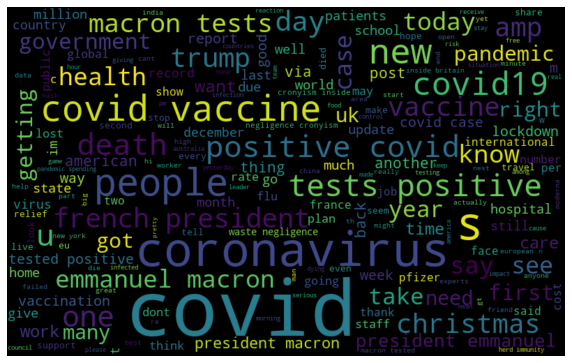

In [30]:
# could be useful to determine the queries added on the report
all_words = ' '.join([text for text in df_tweets['clean_tweet']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()


In [31]:
word_counter = collections.Counter(all_words.split() )
w =word_counter.most_common(10)

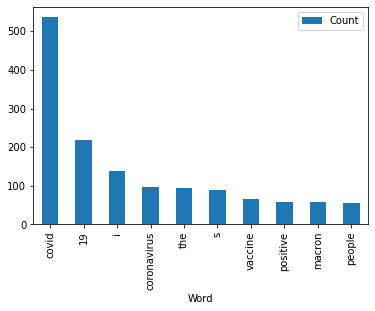

In [32]:
df = pd.DataFrame(w, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')
plt.savefig('barplot.png')
